# Pivot Point Indicators

https://en.wikipedia.org/wiki/Pivot_point_(technical_analysis)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:pivot_points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
market = 'SPY'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)
benchmark = yf.download(market,start,end)

# View Columns
dataset.head()
benchmark.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,215.875137,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,217.159409,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,216.986893,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,217.763229,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,217.044403,46265300


In [3]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

# Stock Pivot Points

## Standard Pivot Points

In [4]:
# Floor Pivot Points (Basic Pivot Points) - Support and Resistance
# https://www.investopedia.com/trading/using-pivot-points-for-predictions/
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)  
R1 = pd.Series(2 * PP - dataset['Low'])  
S1 = pd.Series(2 * PP - dataset['High'])  
R2 = pd.Series(PP + dataset['High'] - dataset['Low'])  
S2 = pd.Series(PP - dataset['High'] + dataset['Low'])  
R3 = pd.Series(dataset['High'] + 2 * (PP - dataset['Low']))  
S3 = pd.Series(dataset['Low'] - 2 * (dataset['High'] - PP))
R4 = pd.Series(dataset['High'] + 3 * (PP - dataset['Low']))  
S4 = pd.Series(dataset['Low'] - 3 * (dataset['High'] - PP))
R5 = pd.Series(dataset['High'] + 4 * (PP - dataset['Low']))  
S5 = pd.Series(dataset['Low'] - 4 * (dataset['High'] - PP))
P = pd.Series((dataset['Open'] + (dataset['High'] + dataset['Low'] + dataset['Close'])) / 4) # Opening Price Formula
psr = {'P':P, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3,'R4':R4, 'S4':S4,'R5':R5, 'S5':S5}  
PSR = pd.DataFrame(psr)  
dataset = dataset.join(PSR)
print(dataset.head())

             Open   High    Low  Close  Adj Close    Volume   Returns  \
Date                                                                    
2017-01-03  11.42  11.65  11.02  11.43      11.43  55182000       NaN   
2017-01-04  11.45  11.52  11.24  11.43      11.43  40781200  0.000000   
2017-01-05  11.43  11.69  11.23  11.24      11.24  38855200 -0.016623   
2017-01-06  11.29  11.49  11.11  11.32      11.32  34453500  0.007117   
2017-01-09  11.37  11.64  11.31  11.49      11.49  37128000  0.015018   

                  P         R1         R2         R3     R4         R5  \
Date                                                                     
2017-01-03  11.3800  11.713333  11.996667  12.343333  12.69  13.036667   
2017-01-04  11.4100  11.553333  11.676667  11.833333  11.99  12.146667   
2017-01-05  11.3975  11.543333  11.846667  12.003333  12.16  12.316667   
2017-01-06  11.3025  11.503333  11.686667  11.883333  12.08  12.276667   
2017-01-09  11.4525  11.650000  11.810000  1

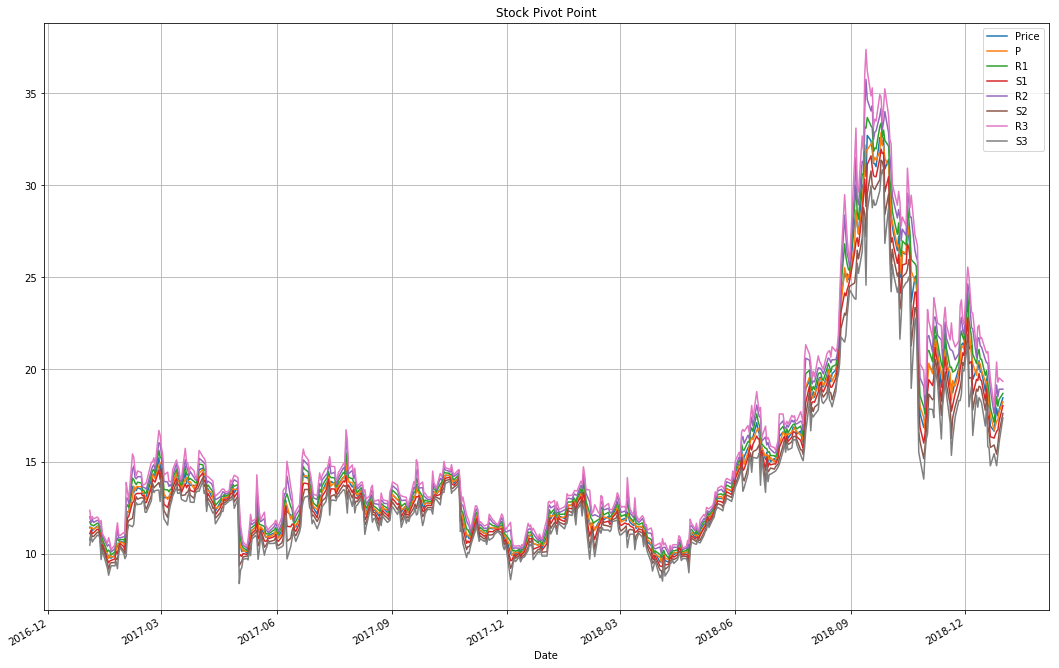

In [5]:
# labels = ['Price','P','R1','S1','R2','S2','R3','S3']
pivot_point = pd.concat([dataset['Adj Close'],P,R1,S1,R2,S2,R3,S3],axis=1).plot(figsize=(18,12),grid=True)
plt.title('Stock Pivot Point')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()

In [6]:
dataset['Adj Close']['2018-05-01':'2018-06-01']

Date
2018-05-01    11.13
2018-05-02    10.97
2018-05-03    10.93
2018-05-04    11.28
2018-05-07    11.59
2018-05-08    11.61
2018-05-09    11.95
2018-05-10    12.13
2018-05-11    11.95
2018-05-14    12.23
2018-05-15    12.45
2018-05-16    12.82
2018-05-17    12.82
2018-05-18    13.00
2018-05-21    12.99
2018-05-22    12.98
2018-05-23    13.10
2018-05-24    13.41
2018-05-25    13.54
2018-05-29    13.36
2018-05-30    13.82
2018-05-31    13.73
2018-06-01    14.40
Name: Adj Close, dtype: float64

In [7]:
date_range = dataset[['Adj Close','P','R1','S1','R2','S2','R3','S3']]['2018-05-01':'2018-06-01']# Pick Date Ranges

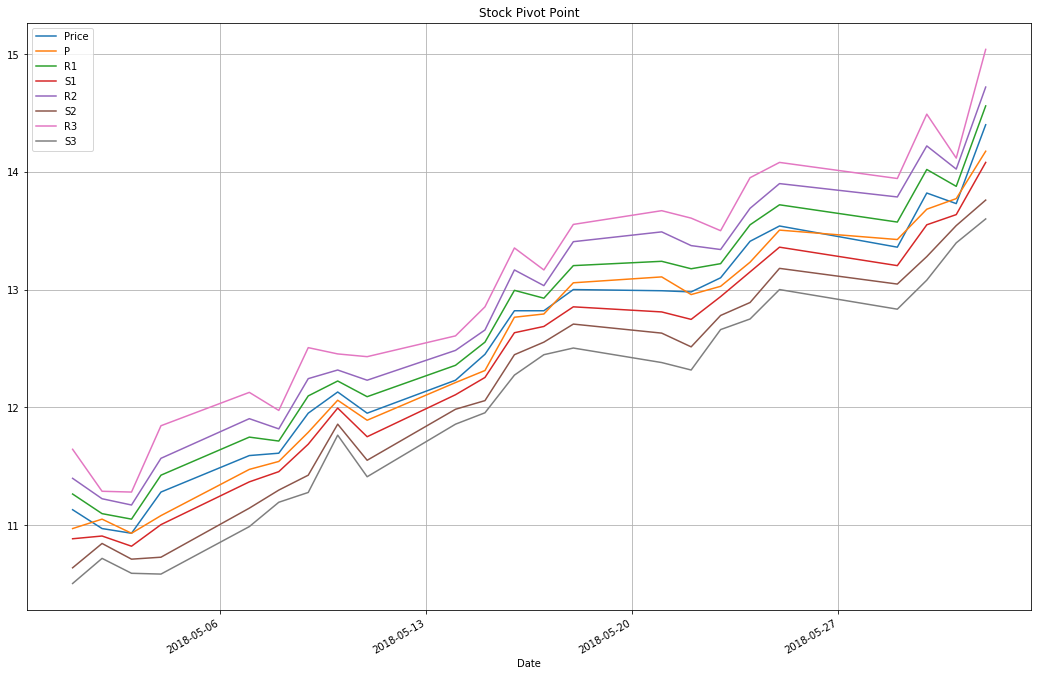

In [8]:
date_range.plot(figsize=(18,12),grid=True)
plt.title('Stock Pivot Point')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()

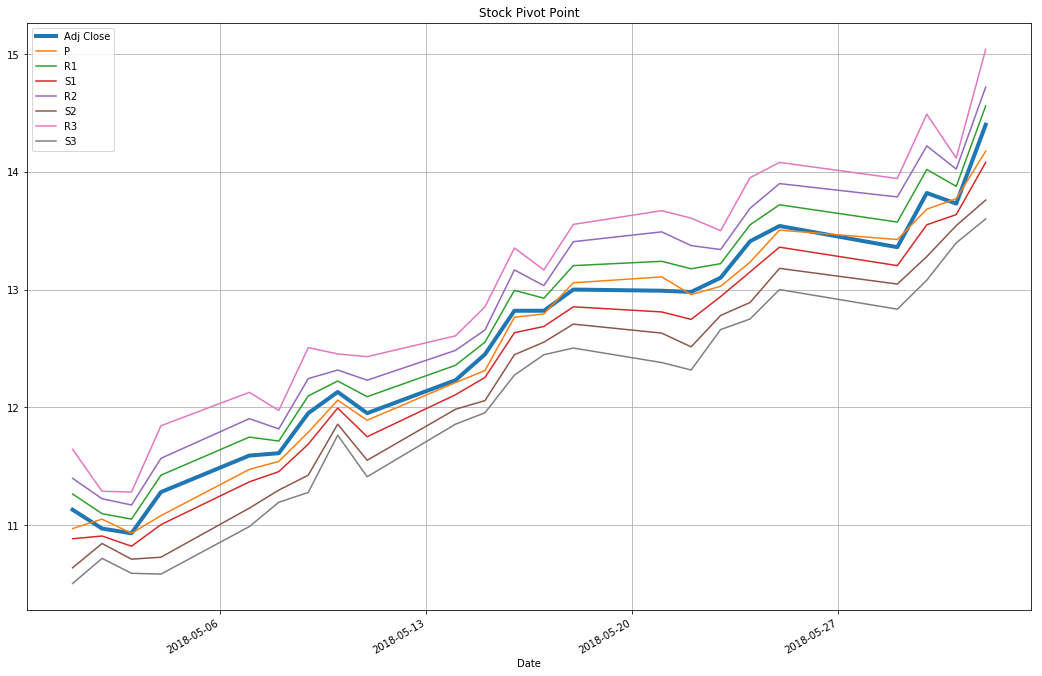

In [9]:
ax = date_range.plot(figsize=(18,12), grid=True) 
ax.lines[0].set_linewidth(4) # Plot Specific Line
plt.title('Stock Pivot Point')
plt.legend()
plt.show()

## Woodie's Pivot Points

In [10]:
# Woodie's Pivot Points
P = pd.Series((dataset['High'] + dataset['Low'] + 2*dataset['Close']) / 4)  
R1 = pd.Series(2 * P - dataset['Low'])  
S1 = pd.Series(2 * P - dataset['High'])  
R2 = pd.Series(P + dataset['High'] - dataset['Low'])  
S2 = pd.Series(P - dataset['High'] + dataset['Low'])  
wpp = {'P':P, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2}  
WPP = pd.DataFrame(wpp)  
# dataset = dataset.join(WPP)  

In [11]:
WPP.head()

,P,R1,R2,S1,S2
Date,,,,,
2017-01-03,11.3825,11.745,12.0125,11.115,10.7525
2017-01-04,11.4050,11.570,11.6850,11.290,11.1250
2017-01-05,11.3500,11.470,11.8100,11.010,10.8900
2017-01-06,11.3100,11.510,11.6900,11.130,10.9300
2017-01-09,11.4825,11.655,11.8125,11.325,11.1525


## Camarilla's Pivot Points

In [12]:
# Camarilla's Pivot Points
R1 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (2+dataset['Close']))  
R2 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (4+dataset['Close']))  
R3 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (6+dataset['Close']))  
R4 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (12+dataset['Close']))    
S1 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/12)  
S2 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/6) 
S3 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/4)  
S4 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/2) 
cpp = {'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3,'R4':R4, 'S4':S4}  
CPP = pd.DataFrame(cpp)  
# dataset = dataset.join(CPP)  

In [13]:
CPP.head()

,R1,R2,R3,R4,S1,S2,S3,S4
Date,,,,,,,,
2017-01-03,0.051601,0.044913,0.039759,0.029577,0.894750,1.789500,2.68425,5.3685
2017-01-04,0.022934,0.019961,0.017671,0.013146,0.926833,1.853667,2.78050,5.5610
2017-01-05,0.038218,0.033202,0.029350,0.021773,0.894500,1.789000,2.68350,5.3670
2017-01-06,0.031381,0.027285,0.024134,0.017925,0.908500,1.817000,2.72550,5.4510
2017-01-09,0.026909,0.023434,0.020755,0.015453,0.927250,1.854500,2.78175,5.5635


## Tom DeMark's

In [14]:
# Tom DeMark's
dataset = yf.download(symbol,start,end)

h_l_c = dataset['Close'] < dataset['Open']
h_lc = dataset['Close'] > dataset['Open']
hl_c = dataset['Close'] == dataset['Open']
P = np.zeros(len(dataset['Close']))
P[h_l_c] = dataset['High'][h_l_c] + 2.0 * dataset['Low'][h_l_c] + dataset['Close'][h_l_c]
P[h_lc] = 2.0 * dataset['High'][h_lc] + dataset['Low'][h_lc] + dataset['Close'][h_lc]
P[hl_c] = dataset['High'][hl_c] + dataset['Low'][hl_c] + 2.0 * dataset['Close'][hl_c]
S1 = P / 2.0 - dataset['High']
R1 = P / 2.0 - dataset['Low']
P = P / 4.0
tdm = {'P': P, 'S1': S1, 'R1': R1}
TDM = pd.DataFrame(tdm)

[*********************100%***********************]  1 of 1 downloaded


In [15]:
TDM.head()

,P,R1,S1
Date,,,
2017-01-03,11.4375,11.855,11.225
2017-01-04,11.3575,11.475,11.195
2017-01-05,11.3475,11.465,11.005
2017-01-06,11.3525,11.595,11.215
2017-01-09,11.5200,11.730,11.400


## Fibonacci's Pivot Point

In [16]:
# Fibonacci's Pivot Points
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)  
R1 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 0.382))
R2 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 0.618))  
R3 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 1.000))
S1 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 0.382))
S2 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 0.618))  
S3 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 1.000))
fpp = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
FPP = pd.DataFrame(fpp)  
# dataset = dataset.join(CPP) 

In [17]:
FPP.head()

,PP,R1,R2,R3,S1,S2,S3
Date,,,,,,,
2017-01-03,11.366667,11.607327,11.756007,11.996667,11.126007,10.977327,10.736667
2017-01-04,11.396667,11.503627,11.569707,11.676667,11.289707,11.223627,11.116667
2017-01-05,11.386667,11.562387,11.670947,11.846667,11.210947,11.102387,10.926667
2017-01-06,11.306667,11.451827,11.541507,11.686667,11.161507,11.071827,10.926667
2017-01-09,11.480000,11.606060,11.683940,11.810000,11.353940,11.276060,11.150000


## Chicago Floor Trading Pivotal Point

https://www.fmlabs.com/reference/default.htm

In [18]:
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)
R1 = pd.Series(PP * 2 - dataset['Low'].shift())
R2 = pd.Series(PP + (dataset['High'].shift() - dataset['Low'].shift()))
S1 = pd.Series(PP * 2 - dataset['High'].shift())
S2 = pd.Series(PP - (dataset['High'].shift() - dataset['Low'].shift()))
CFpp = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2}
CFPP = pd.DataFrame(CFpp)

In [19]:
CFPP.head()

,PP,R1,R2,S1,S2
Date,,,,,
2017-01-03,11.366667,NaN,NaN,NaN,NaN
2017-01-04,11.396667,11.773333,12.026667,11.143333,10.766667
2017-01-05,11.386667,11.533333,11.666667,11.253333,11.106667
2017-01-06,11.306667,11.383333,11.766667,10.923333,10.846667
2017-01-09,11.480000,11.850000,11.860000,11.470000,11.100000
